In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
from activ.analytics import heatmap
from activ.clustering import UmapClusteringResults
from os.path import dirname, join
from sklearn.metrics import accuracy_score

In [2]:
f = h5py.File('/Users/ahyeon/Desktop/activ misc/predict_scores2.h5', 'r')

In [3]:
predictions = f['score'][:]
norm_predictions = f['norm_score'][:]
labels = f['clusters'][:]
umap_dims = f['umap_dimensions'][:]
cluster_sizes = f['cluster_sizes'][:]
cluster_sizes

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [4]:
predictions.shape

(50, 49, 247)

(50, 1)


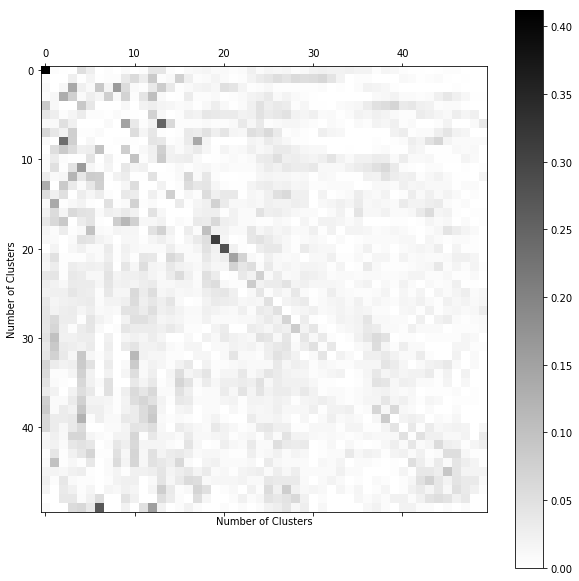

In [11]:
# Confusion Matrix
csize = 50
conf = np.zeros((50,csize,csize))

for i in range(50):
    labs = list(map(int,labels[i,csize-2,:]))
    preds = list(map(int,predictions[i,csize-2,:]))
    
    for l,p in zip(labs, preds):
        conf[i,l,p]+=1

new_conf = conf.mean(axis=0)
new_conf = np.matrix((new_conf))
denom = np.array(new_conf.sum(axis=1))
print(denom.shape)
new_denom = np.repeat(denom, csize,axis=1)
this = new_conf/new_denom

plt.rcParams['figure.figsize'] = 10, 10
plt.matshow(this, cmap='gray_r')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Clusters')
plt.colorbar()


In [87]:
# Return true positive, true negative, false positive, false negative given a matrix, cluster number, and specified 
# size of matrix 

def confusion_matrix_values(conf_mat, cluster_num, size):
    this = np.matrix(conf_mat[:size,:size])
    for i in range(size):
        if (i==cluster_num):
            tp = this[i,i]
            tn = this.sum() - this[i,:].sum() - this[:,i].sum()
            fp = this[:,i].sum() - this[i,i]
            fn = this[i,:].sum() - this[i,i]
    return tp, tn, fp, fn

In [92]:
#specificity
def true_neg_rate(tn, fp):
    return tn/(tn+fp)

#sensitivity
def true_pos_rate(tp, fn):
    return tp/(tp+fn)

def false_neg_rate(fn, tp):
    return fn/(fn+tp)
    
def false_pos_rate(fp, tn):
    return fp/(fp+tn)
    


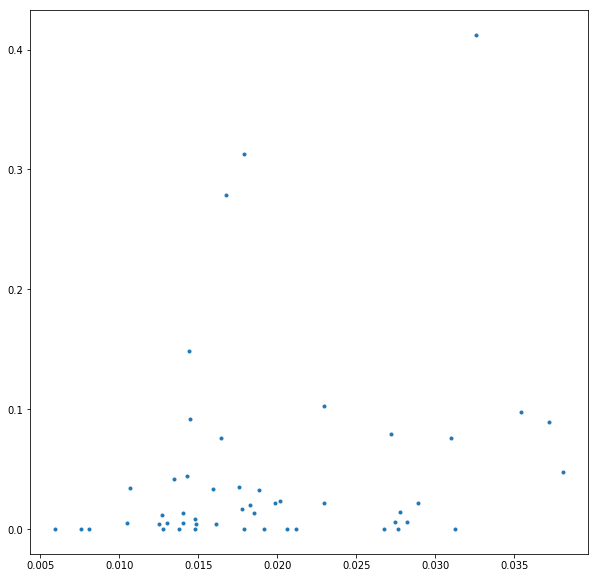

In [94]:
# ROC Curve
fprs = []
tprs = []
for i in range(50):
    tp, tn, fp, fn = confusion_matrix_values(this, i, 50)
    fpr = false_pos_rate(fp, tn)
    tpr = true_pos_rate(tp, fn)
    fprs.append(fpr)
    tprs.append(tpr)
plt.plot(fprs, tprs, '.')

In [71]:
row = mat[2,:].sum()
row

0.19064748201438847

In [72]:
i = mat[2,2]
i

0.014388489208633093

In [75]:
row-i

0.17625899280575538

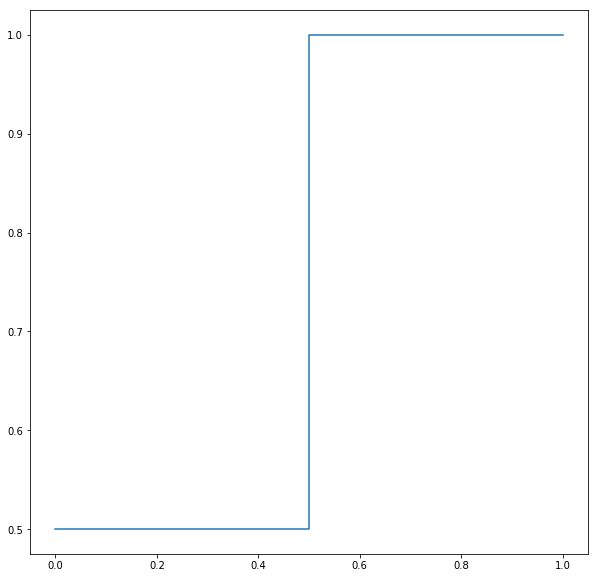

In [82]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr

plt.plot(fpr, tpr)